In [31]:
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import time

import pylidc as pl
from pylidc.Annotation import feature_names as fnames
from scipy.misc import imsave as imsave
import PIL.Image as Image
import matplotlib.image as mpimg

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import scipy.ndimage

from preprocessing import full_prep
from preprocessing import step1
from preprocessing import preprocessing_lib as prep_lib

config = {}
# In this notebook, we want to save consecutive three slices as one png.
# We need to be careful with the HU crop value.
# Set where to save the prepared data
# You should make 3 subdirs here: scans, patches, masks 
config['savepath'] = '/home/shenxk/LIDC/prepared_data_v2'
os.chdir(config['savepath'])


In [2]:
all_scans = pl.query(pl.Scan)

In [34]:
path = all_scans[490].get_path_to_dicom_files()
scan = step1.load_scan(path)
case, spacing = step1.get_pixels_hu(scan)
print(type(scan))
print(spacing)
print(case.shape)


<class 'list'>
[ 1.25        0.74218798  0.74218798]
(232, 512, 512)


-2048 1453


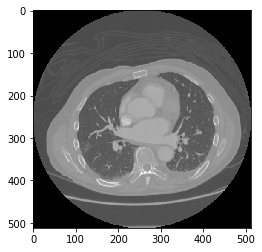

In [39]:
print(np.min(case[100,:,:]),np.max(case[100,:,:]))
plt.imshow(case[100,:,:],cmap = plt.cm.gray)
plt.show()

-1020 1453


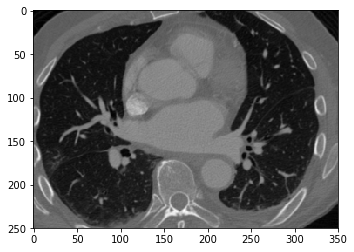

In [42]:
print(np.min(case[100,150:400,100:450]),np.max(case[100,150:400,100:450]))
plt.imshow(case[100,150:400,100:450],cmap = plt.cm.gray)
plt.show()

In [46]:
segmented_lungs_fill = prep_lib.segment_lung_mask(image_normalized, True)
dilated_mask = prep_lib.dilateMask(segmented_lungs_fill)
image_lung = prep_lib.apply_mask(image_normalized, dilated_mask, 170)


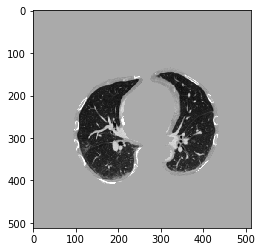

In [47]:
plt.imshow(image_lung[100,:,:], cmap=plt.cm.gray)
plt.show()

In [33]:
image_normalized = prep_lib.normalize(case,-1024,600)

0.0 255.0


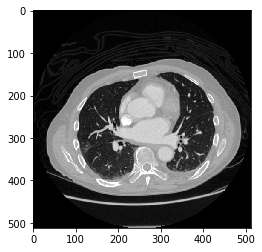

In [36]:
print(np.min(image_normalized),np.max(image_normalized))
plt.imshow(image_normalized[100,:,:],cmap = plt.cm.gray)
plt.show()

In [26]:
bw = step1.binarize_per_slice(case, spacing)

/home/shenxk/LIDC/preprocessing/step1.py:65: RuntimeWarning: invalid value encountered in less
  current_bw = scipy.ndimage.filters.gaussian_filter(np.multiply(image[i].astype('float32'), nan_mask), sigma, truncate=2.0) < intensity_th


In [29]:
print(np.min(bw),np.max(bw))

False True


Loading dicom files ... This may take a moment.


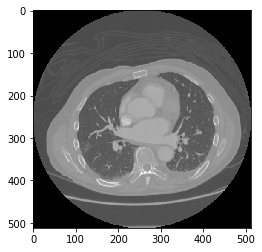

-1024.0 4095.0
<class 'sqlalchemy.orm.query.Query'>


In [24]:
images = all_scans[490].load_all_dicom_images()
#anns = all_anns.filter(pl.Annotation.scan_id==492)
#anns[0].visualize_in_scan()
#anns = pl.query(scan_id==492)     
num_slices = len(images)
image_1 = images[0].pixel_array

images_array = np.zeros((num_slices, image_1.shape[0], image_1.shape[1]))
for i in range(num_slices):
    images_array[i,:,:] = images[i].pixel_array
    

plt.imshow(images_array[100,:,:],cmap=plt.cm.gray)
plt.show()
print(np.min(images_array),np.max(images_array))
print(type(all_scans))

In [13]:
#image = np.stack([s.pixel_array for s in slices])
# Convert to int16 (from sometimes int16), 
# should be possible as values should always be low enough (<32k)
slices = images.astype(np.int16)

# Convert to Hounsfield units (HU)
for slice_number in range(num_slices):        
    intercept = slices[slice_number].RescaleIntercept
    slope = slices[slice_number].RescaleSlope

    if slope != 1:
        image[slice_number] = slope * image[slice_number].astype(np.float64)
        image[slice_number] = image[slice_number].astype(np.int16)

    image[slice_number] += np.int16(intercept)

AttributeError: 'list' object has no attribute 'astype'

In [ ]:
for i in range

In [75]:
all_scans = pl.query(pl.Scan)
savepath = config['savepath']
#num = 2
num_scans = all_scans.count()

#Create a table to save the corresponding origin path of the saved npys.
with open('names.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['short_name','origin_path'])

In [76]:
with open('miss.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['short_name'])

In [126]:
#Save each scan as an npy file.
for id in range(10):
    shortname = '0'*(4-len(str(id)))+str(id)
    try:
        path = all_scans[id].get_path_to_dicom_files()
    except AssertionError:
        with open('miss.csv', 'a') as f:      
            writer = csv.writer(f)
            writer.writerow([shortname])
        continue
    else:
        images = all_scans[id].load_all_dicom_images()
        first_image = images[0].pixel_array
        [width, height] = first_image.shape
        num_slices = len(images)
        print(num_slices)
        images_array = np.zeros((num_slices, width, height))
        
        for i in range(num_slices):
            images_array[i,:,:] = images[i].pixel_array
        print(shortname)
        print(np.min(images_array), np.max(images_array))
        
        path = all_scans[id].get_path_to_dicom_files()
        np.save(os.path.join(savepath, 'scans', shortname+'.npy'), images_array)
        #imsave(os.path.join(savepath, 'scans', shortname+'.png'),images_array)

        with open('names.csv', 'a') as f:      
            #fieldnames = ['short_name', 'origin_path']
            #writer = csv.DictWriter(f, fieldnames=fieldnames)
            #writer.writeheader()
            writer = csv.writer(f)
            writer.writerow([shortname, path])

Loading dicom files ... This may take a moment.
87
0000
-2048.0 8155.0
Loading dicom files ... This may take a moment.
136
0001
-2479.0 24796.0
Loading dicom files ... This may take a moment.
113
0002
-7132.0 18507.0
Loading dicom files ... This may take a moment.
150
0003
0.0 3854.0
Loading dicom files ... This may take a moment.
125
0004
0.0 4085.0
Loading dicom files ... This may take a moment.
112
0005
-2048.0 4032.0
Loading dicom files ... This may take a moment.
127
0006
0.0 4095.0
Loading dicom files ... This may take a moment.
153
0007
0.0 4095.0
Loading dicom files ... This may take a moment.
102
0008
-2048.0 4535.0
Loading dicom files ... This may take a moment.
111
0009
0.0 4095.0


In [143]:
with open('error.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['short_name','cluster'])
    
with open('nodule_size.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['short_name','cluster','size'])

In [144]:
with open('scan_size.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['short_name','size'])

In [150]:
# Generate mask from the four annotations for each nodule. 
# Only nodules with four annotations available are included. 
# Only voxels marked by three or four radiologists are regarded as nodule voxels.
start = time.clock()
num_scans = all_scans.count()
#num = 2
all_anns = pl.query(pl.Annotation).join(pl.Scan)
for scan_id in range(493, num_scans):
    anns = all_anns.filter(pl.Annotation.scan_id==scan_id)
    scan = all_scans[scan_id]
    shortname_scan = '0'*(4-len(str(scan_id)))+str(scan_id)
    
    try:
        path = scan.get_path_to_dicom_files()
    except AssertionError:
        print(shortname_scan, 'does not exist')
        continue
    else:
        images = scan.load_all_dicom_images()
        first_image = images[0].pixel_array
        [width, height] = first_image.shape
        num_slices = len(images)
        images_array = np.zeros((num_slices, width, height))
        for i in range(num_slices):
            images_array[i,:,:] = images[i].pixel_array
        image_tran = images_array.transpose((1,2,0))
        slice_thickness = scan.slice_thickness
        
        with open('scan_size.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow([shortname_scan, image_tran.shape])
        print(shortname_scan)

        anns_clustered = scan.cluster_annotations()
        for cluster in range(len(anns_clustered)):
            if len(anns_clustered[cluster]) == 4:
                # Get the min slice of the bbox
                min_slice = 1000
                max_slice = 0
                contours = [0,0,0,0]
                fnames = [0,0,0,0]
                index_of_contour = {}
                for i in range(4):
                    contours[i] = sorted(anns_clustered[cluster][i].contours, key=lambda c: c.image_z_position)
                    fnames[i] = anns_clustered[cluster][i].scan.sorted_dicom_file_names.split(',')
                    index_of_contour[i] = [fnames[i].index(c.dicom_file_name) for c in contours[i]]
                    min_slice = min(min(index_of_contour[i]),min_slice)
                    max_slice = max(max(index_of_contour[i]),max_slice)
                #print(index_of_contour[0][0]:index_of_contour[0][-1]+1)
                
                mask0, bbox0 = anns_clustered[cluster][0].get_boolean_mask(return_bbox=True)
                mask1, bbox1 = anns_clustered[cluster][1].get_boolean_mask(return_bbox=True)
                mask2, bbox2 = anns_clustered[cluster][2].get_boolean_mask(return_bbox=True)
                mask3, bbox3 = anns_clustered[cluster][3].get_boolean_mask(return_bbox=True)
                bbox_min = np.zeros(3)
                bbox_min[0] = np.min([bbox0[0,0], bbox1[0,0], bbox2[0,0], bbox3[0,0]])
                bbox_min[1] = np.min([bbox0[1,0], bbox1[1,0], bbox2[1,0], bbox3[1,0]])
                bbox_min[2] = np.min([bbox0[2,0], bbox1[2,0], bbox2[2,0], bbox3[2,0]])
                bbox_max = np.zeros(3)
                bbox_max[0] = np.max([bbox0[0,1], bbox1[0,1], bbox2[0,1], bbox3[0,1]])
                bbox_max[1] = np.max([bbox0[1,1], bbox1[1,1], bbox2[1,1], bbox3[1,1]])
                bbox_max[2] = np.max([bbox0[2,1], bbox1[2,1], bbox2[2,1], bbox3[2,1]])

                mask_new = np.zeros((4,int(bbox_max[0] - bbox_min[0]+1), int(bbox_max[1] - bbox_min[1]+1),
                                     max_slice-min_slice+1))

                margin0 = bbox0[:,0] - bbox_min
                margin1 = bbox1[:,0] - bbox_min
                margin2 = bbox2[:,0] - bbox_min
                margin3 = bbox3[:,0] - bbox_min
                margin0 = np.asarray(margin0, dtype=int)
                margin1 = np.asarray(margin1, dtype=int)
                margin2 = np.asarray(margin2, dtype=int)
                margin3 = np.asarray(margin3, dtype=int)
                #z_margin0 = int(margin0[2]/slice_thickness)
                #z_margin1 = int(margin1[2]/slice_thickness)
                #z_margin2 = int(margin2[2]/slice_thickness)
                #z_margin3 = int(margin3[2]/slice_thickness)
                
                # Get the coordinate of the lower bound in the original scan. 
                lower_bound = [int(bbox_min[0]),int(bbox_min[1]),min_slice]
                #print(bbox0)
                #print(mask0.shape)
                #print(mask_new[0, margin0[0]:int(margin0[0]+(bbox0[0,1]-bbox0[0,0])+1), margin0[1]:int(margin0[1]+(bbox0[1,1]-bbox0[1,0])+1),
                #             index_of_contour[0][0]-min_slice:index_of_contour[0][-1]-min_slice+1].shape)
                #print(index_of_contour[0])
                #print(min_slice)
                #print(mask_new.shape)
                
                #zs = np.unique([c.image_z_position for c in anns_clustered[cluster][3].contours])
                #z_to_index = dict(zip(zs,range(len(zs))))
                try:
                    mask_new[0, margin0[0]:int(margin0[0]+(bbox0[0,1]-bbox0[0,0])+1), margin0[1]:int(margin0[1]+(bbox0[1,1]-bbox0[1,0])+1),
                             index_of_contour[0][0]-min_slice:index_of_contour[0][-1]-min_slice+1] = mask0
                    mask_new[1, margin1[0]:int(margin1[0]+(bbox1[0,1]-bbox1[0,0])+1), margin1[1]:int(margin1[1]+(bbox1[1,1]-bbox1[1,0])+1),
                             index_of_contour[1][0]-min_slice:index_of_contour[1][-1]-min_slice+1] = mask1
                    mask_new[2, margin2[0]:int(margin2[0]+(bbox2[0,1]-bbox2[0,0])+1), margin2[1]:int(margin2[1]+(bbox2[1,1]-bbox2[1,0])+1),
                             index_of_contour[2][0]-min_slice:index_of_contour[2][-1]-min_slice+1] = mask2
                    mask_new[3, margin3[0]:int(margin3[0]+(bbox3[0,1]-bbox3[0,0])+1), margin3[1]:int(margin3[1]+(bbox3[1,1]-bbox3[1,0])+1),
                             index_of_contour[3][0]-min_slice:index_of_contour[3][-1]-min_slice+1] = mask3
                except ValueError:
                    print(shortname_scan, 'error')
                    with open('error.csv', 'a') as f:
                        writer = csv.writer(f)
                        writer.writerow([shortname_scan, cluster])
                    continue
                else:
                    [p_mask, width_mask, height_mask, z_mask] = mask_new.shape
                    mask_sum = np.zeros(mask_new.shape[1:])
                    mask_overlap = np.zeros(mask_new.shape[1:])
                    with open('nodule_size.csv', 'a') as f:
                        writer = csv.writer(f)
                        writer.writerow([shortname_scan, cluster, mask_overlap.shape])
                    #print(mask_overlap.shape)

                    for i in range(width_mask):
                        for j in range(height_mask):
                            for k in range(z_mask):
                                mask_sum[i,j,k] = np.sum(mask_new[:,i,j,k])
                                if mask_sum[i,j,k] >= 3:
                                    mask_overlap[i,j,k] = 1



                    # Define the size of the bounding box
                    box_size = config['patch_size']
                    # Cut the bounding box according to the size of the overlapped annotation area.
                    mask_where = np.argwhere(mask_overlap == 1)
                    box_new_min = np.min(mask_where, axis = 0)
                    box_new_max = np.max(mask_where, axis = 0)
                    mask_overlap_cut = mask_overlap[box_new_min[0]:box_new_max[0]+1, box_new_min[1]:box_new_max[1]+1,
                                                    box_new_min[2]:box_new_max[2]+1]
                    [width_cut, height_cut, z_cut] = mask_overlap_cut.shape

                    # Pad the mask to get the desired size
                    num_pad_width0 = int(np.floor((box_size - width_cut)/2))
                    num_pad_width1 = int(box_size - width_cut - num_pad_width0)
                    num_pad_height0 = int(np.floor((box_size - height_cut)/2))
                    num_pad_height1 = int(box_size - height_cut - num_pad_height0)
                    mask_pad = np.pad(mask_overlap_cut, ((num_pad_width0, num_pad_width1),(num_pad_height0, num_pad_height1),(0,0)), 
                                      'constant', constant_values = ((0,0),(0,0),(0,0)))

                    # Save the padded masks. 
                    # Each consecutive three slices are saved in one npy, resulted in num_slice-2 npy files.
                    cluster_id = '0'*(2-len(str(cluster)))+str(cluster)
                    
                    mask_pad = np.asarray(mask_pad, dtype=np.uint8)

                    
                    for i in range(z_cut-2):
                        #print(z_cut)
                        #mask_pad_save = mask_pad[:,:,i:i+3]
                        #print(mask_pad_save.shape)
                        #np.save(os.path.join(savepath, 'masks', 'mask'+shortname_scan+cluster_id+'0'*(2-len(str(i)))+str(i)),
                        #        mask_pad[:,:,i:i+3])
                        im = Image.fromarray(mask_pad[:,:,i:i+3])
                        im.save(os.path.join(savepath, 'masks', 'mask'+shortname_scan+cluster_id+'0'*(2-len(str(i)))+str(i)+'.png'))
                        #imsave(os.path.join(savepath, 'masks', 'mask'+shortname_scan+cluster_id+'0'*(2-len(str(i)))+str(i)+'.png'),
                        #        mask_pad_save)

                    # Get the coordinate of padded mask's lower bound in the original scan.
                    lower_bound = lower_bound + box_new_min - [num_pad_width0, num_pad_height0, 0]

                    # Get the corresponding ct patch
                    ct_patch = image_tran[lower_bound[0]:lower_bound[0]+box_size, lower_bound[1]:lower_bound[1]+box_size, 
                                            lower_bound[2]:lower_bound[2]+z_cut]
                    #print(np.min(ct_patch),np.max(ct_patch))
                    
                    # Clip the patch by the boundary of [-1200, 600], then normalize to [0, 255]
                    ct_patch[ct_patch > 600] = 600
                    ct_patch[ct_patch < -1200] = -1200
                    ct_patch = (ct_patch + 1200) / 1800 * 255  
                    ct_patch = np.asarray(ct_patch, dtype=np.uint8)
                    #print(np.min(ct_patch),np.max(ct_patch))
                    for i in range(z_cut-2):
                        #np.save(os.path.join(savepath, 'patches','ct_patch'+shortname_scan+cluster_id+'0'*(2-len(str(i)))+str(i)),
                        #       ct_patch[:,:,i:i+3])
                        im = Image.fromarray(ct_patch[:,:,i:i+3])
                        #im.save(os.path.join(savepath, 'patches','ct_patch'+shortname_scan+cluster_id+'0'*(2-len(str(i)))+str(i))+'.png')
                        imsave(os.path.join(savepath, 'patches','ct_patch'+shortname_scan+cluster_id+'0'*(2-len(str(i)))+str(i))+'.png',
                                ct_patch[:,:,i:i+3])

elapsed = (time.clock() - start)
print('Time used:', elapsed)

Loading dicom files ... This may take a moment.
0493
Loading dicom files ... This may take a moment.


/home/shenxk/anaconda2/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:181: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


0494
Loading dicom files ... This may take a moment.
0495
Loading dicom files ... This may take a moment.
0496
Loading dicom files ... This may take a moment.
0497
Loading dicom files ... This may take a moment.
0498
Loading dicom files ... This may take a moment.
0499
Loading dicom files ... This may take a moment.
0500
Loading dicom files ... This may take a moment.
0501
Loading dicom files ... This may take a moment.
0502
Loading dicom files ... This may take a moment.
0503
Loading dicom files ... This may take a moment.
0504
Loading dicom files ... This may take a moment.
0505
Loading dicom files ... This may take a moment.
0506
Loading dicom files ... This may take a moment.
0507
Loading dicom files ... This may take a moment.
0508
Loading dicom files ... This may take a moment.
0509
Loading dicom files ... This may take a moment.
0510
Loading dicom files ... This may take a moment.
0511
Loading dicom files ... This may take a moment.
0512
Loading dicom files ... This may take a m

In [ ]:
savepath = '/home/shenxk/LIDC/prepared_data'
#os.chdir('/home/shenxk/LIDC/prepared_data/masks')
# Generate mask from the four annotations for each nodule. 
# Only nodules with four annotations available are included. 
# Only voxels marked by three or four radiologists are regarded as nodule voxels.
start = time.clock()
num_scans = all_scans.count()
#num = 2
all_anns = pl.query(pl.Annotation).join(pl.Scan)
for scan_id in range(num_scans):
    anns = all_anns.filter(pl.Annotation.scan_id==scan_id)
    scan = all_scans[scan_id]
    shortname_scan = '0'*(4-len(str(scan_id)))+str(scan_id)
    
    try:
        path = scan.get_path_to_dicom_files()
    except AssertionError:
        print(shortname_scan, 'does not exist')
        continue
    else:
        images = scan.load_all_dicom_images()
        first_image = images[0].pixel_array
        [width, height] = first_image.shape
        num_slices = len(images)
        images_array = np.zeros((num_slices, width, height))
        for i in range(num_slices):
            images_array[i,:,:] = images[i].pixel_array
        image_tran = images_array.transpose((1,2,0))
        slice_thickness = scan.slice_thickness

        anns_clustered = scan.cluster_annotations()
        print(shortname_scan)
        for cluster in range(len(anns_clustered)):
            if len(anns_clustered[cluster]) == 4:
                
                # Get the min slice of the bbox
                min_slice = 1000
                max_slice = 0
                contours = [0,0,0,0]
                fnames = [0,0,0,0]
                index_of_contour = {}
                for i in range(4):
                    contours[i] = sorted(anns_clustered[cluster][i].contours, key=lambda c: c.image_z_position)
                    fnames[i] = anns_clustered[cluster][i].scan.sorted_dicom_file_names.split(',')
                    index_of_contour[i] = [fnames[i].index(c.dicom_file_name) for c in contours[i]]
                    min_slice = min(min(index_of_contour[i]),min_slice)
                    max_slice = max(max(index_of_contour[i]),max_slice)
                #print(index_of_contour[0][0]:index_of_contour[0][-1]+1)
                
                mask0, bbox0 = anns_clustered[cluster][0].get_boolean_mask(return_bbox=True)
                mask1, bbox1 = anns_clustered[cluster][1].get_boolean_mask(return_bbox=True)
                mask2, bbox2 = anns_clustered[cluster][2].get_boolean_mask(return_bbox=True)
                mask3, bbox3 = anns_clustered[cluster][3].get_boolean_mask(return_bbox=True)
                bbox_min = np.zeros(3)
                bbox_min[0] = np.min([bbox0[0,0], bbox1[0,0], bbox2[0,0], bbox3[0,0]])
                bbox_min[1] = np.min([bbox0[1,0], bbox1[1,0], bbox2[1,0], bbox3[1,0]])
                bbox_min[2] = np.min([bbox0[2,0], bbox1[2,0], bbox2[2,0], bbox3[2,0]])
                bbox_max = np.zeros(3)
                bbox_max[0] = np.max([bbox0[0,1], bbox1[0,1], bbox2[0,1], bbox3[0,1]])
                bbox_max[1] = np.max([bbox0[1,1], bbox1[1,1], bbox2[1,1], bbox3[1,1]])
                bbox_max[2] = np.max([bbox0[2,1], bbox1[2,1], bbox2[2,1], bbox3[2,1]])

                mask_new = np.zeros((4,int(bbox_max[0] - bbox_min[0]+1), int(bbox_max[1] - bbox_min[1]+1),
                                     max_slice-min_slice+1))

                margin0 = bbox0[:,0] - bbox_min
                margin1 = bbox1[:,0] - bbox_min
                margin2 = bbox2[:,0] - bbox_min
                margin3 = bbox3[:,0] - bbox_min
                margin0 = np.asarray(margin0, dtype=int)
                margin1 = np.asarray(margin1, dtype=int)
                margin2 = np.asarray(margin2, dtype=int)
                margin3 = np.asarray(margin3, dtype=int)
                #z_margin0 = int(margin0[2]/slice_thickness)
                #z_margin1 = int(margin1[2]/slice_thickness)
                #z_margin2 = int(margin2[2]/slice_thickness)
                #z_margin3 = int(margin3[2]/slice_thickness)
                
                # Get the coordinate of the lower bound in the original scan. 
                lower_bound = [int(bbox_min[0]),int(bbox_min[1]),min_slice]
                #print(bbox0)
                #print(mask0.shape)
                #print(mask_new[0, margin0[0]:int(margin0[0]+(bbox0[0,1]-bbox0[0,0])+1), margin0[1]:int(margin0[1]+(bbox0[1,1]-bbox0[1,0])+1),
                #             index_of_contour[0][0]-min_slice:index_of_contour[0][-1]-min_slice+1].shape)
                #print(index_of_contour[0])
                #print(min_slice)
                #print(mask_new.shape)
                
                #zs = np.unique([c.image_z_position for c in anns_clustered[cluster][3].contours])
                #z_to_index = dict(zip(zs,range(len(zs))))
                try:
                    mask_new[0, margin0[0]:int(margin0[0]+(bbox0[0,1]-bbox0[0,0])+1), margin0[1]:int(margin0[1]+(bbox0[1,1]-bbox0[1,0])+1),
                             index_of_contour[0][0]-min_slice:index_of_contour[0][-1]-min_slice+1] = mask0
                    mask_new[1, margin1[0]:int(margin1[0]+(bbox1[0,1]-bbox1[0,0])+1), margin1[1]:int(margin1[1]+(bbox1[1,1]-bbox1[1,0])+1),
                             index_of_contour[1][0]-min_slice:index_of_contour[1][-1]-min_slice+1] = mask1
                    mask_new[2, margin2[0]:int(margin2[0]+(bbox2[0,1]-bbox2[0,0])+1), margin2[1]:int(margin2[1]+(bbox2[1,1]-bbox2[1,0])+1),
                             index_of_contour[2][0]-min_slice:index_of_contour[2][-1]-min_slice+1] = mask2
                    mask_new[3, margin3[0]:int(margin3[0]+(bbox3[0,1]-bbox3[0,0])+1), margin3[1]:int(margin3[1]+(bbox3[1,1]-bbox3[1,0])+1),
                             index_of_contour[3][0]-min_slice:index_of_contour[3][-1]-min_slice+1] = mask3
                except ValueError:
                    print(shortname_scan, 'error')
                    continue
                else:
                    [p_mask, width_mask, height_mask, z_mask] = mask_new.shape
                    mask_sum = np.zeros(mask_new.shape[1:])
                    mask_overlap = np.zeros(mask_new.shape[1:])

                    for i in range(width_mask):
                        for j in range(height_mask):
                            for k in range(z_mask):
                                mask_sum[i,j,k] = np.sum(mask_new[:,i,j,k])
                                if mask_sum[i,j,k] >= 3:
                                    mask_overlap[i,j,k] = 255



                    # Define the size of the bounding box
                    box_size = config['patch_size']
                    # Cut the bounding box according to the size of the overlapped annotation area.
                    mask_where = np.argwhere(mask_overlap == 255)
                    box_new_min = np.min(mask_where, axis = 0)
                    box_new_max = np.max(mask_where, axis = 0)
                    mask_overlap_cut = mask_overlap[box_new_min[0]:box_new_max[0]+1, box_new_min[1]:box_new_max[1]+1,
                                                    box_new_min[2]:box_new_max[2]+1]
                    [width_cut, height_cut, z_cut] = mask_overlap_cut.shape

                    # Pad the mask to get the desired size
                    num_pad_width0 = int(np.floor((box_size - width_cut)/2))
                    num_pad_width1 = int(box_size - width_cut - num_pad_width0)
                    num_pad_height0 = int(np.floor((box_size - height_cut)/2))
                    num_pad_height1 = int(box_size - height_cut - num_pad_height0)
                    mask_pad = np.pad(mask_overlap_cut, ((num_pad_width0, num_pad_width1),(num_pad_height0, num_pad_height1),(0,0)), 
                                      'constant', constant_values = ((0,0),(0,0),(0,0)))

                    # Save the padded masks. 
                    # Each consecutive three slices are saved in one npy, resulted in num_slice-2 npy files.
                    cluster_id = '0'*(2-len(str(cluster)))+str(cluster)
                    
                    mask_pad = np.asarray(mask_pad, dtype=np.uint8)
                    print(np.min(mask_pad),np.max(mask_pad))
                    
                    for i in range(z_cut-2):
                        #print(z_cut)
                        #mask_pad_save = mask_pad[:,:,i:i+3]
                        #print(mask_pad_save.shape)
                        #np.save(os.path.join(savepath, 'masks', 'mask'+shortname_scan+cluster_id+'0'*(2-len(str(i)))+str(i)),
                        #        mask_pad[:,:,i:i+3])
                        im = Image.fromarray(mask_pad[:,:,i+1])
                        im.save(os.path.join(savepath, 'masks', 'mask'+shortname_scan+cluster_id+'0'*(2-len(str(i)))+str(i)+'.png'))

elapsed = (time.clock() - start)
print('Time used:', elapsed)

Loading dicom files ... This may take a moment.
0000
0 255
0 255
0 255
Loading dicom files ... This may take a moment.
0001
0 255
0 255
Loading dicom files ... This may take a moment.
0002
0 255
Loading dicom files ... This may take a moment.
0003
Loading dicom files ... This may take a moment.
0004
Loading dicom files ... This may take a moment.
0005
0 255
Loading dicom files ... This may take a moment.
0006
0 255
Loading dicom files ... This may take a moment.
0007
Loading dicom files ... This may take a moment.
0008
Loading dicom files ... This may take a moment.
0009
Loading dicom files ... This may take a moment.
0010
0 255
Loading dicom files ... This may take a moment.
0011
0 255
Loading dicom files ... This may take a moment.
0012
Loading dicom files ... This may take a moment.
0013
0 255
0 255
0 255
Loading dicom files ... This may take a moment.
0014
0 255
Loading dicom files ... This may take a moment.
0015
0 255
0 255
Loading dicom files ... This may take a moment.
0016
0 2

<class 'numpy.ndarray'>
(64, 64)
0.0 1.0


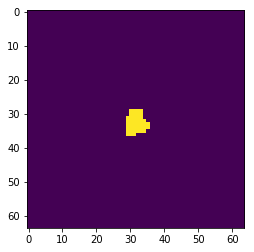

In [174]:
os.chdir('/home/shenxk/LIDC/prepared_data/masks')
x = mpimg.imread('mask00010004.png')
print(type(x))
print(x.shape)
plt.imshow(x)
print(np.min(x),np.max(x))
plt.show()

(64, 64, 3)


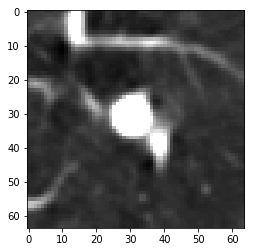

(64, 64, 3)


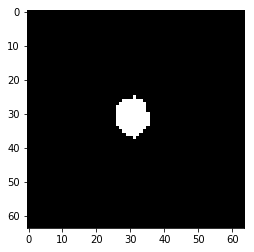

In [152]:
os.chdir('/home/shenxk/LIDC/prepared_data2/patches')

x=mpimg.imread('ct_patch10140000.png')
print(x.shape)
plt.imshow(x[:,:,1],cmap=plt.cm.gray)
plt.show()

os.chdir('/home/shenxk/LIDC/prepared_data2/masks')
x=mpimg.imread('mask10140000.png')
print(x.shape)
plt.imshow(x[:,:,1],cmap=plt.cm.gray)
plt.show()

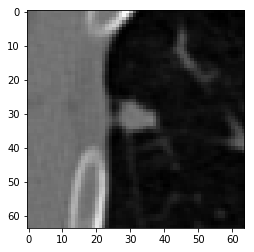

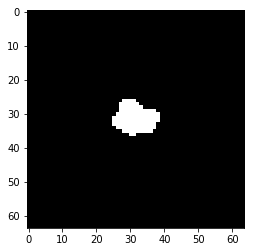

In [67]:
x=np.load('./patches/ct_patch04560002.npy')
plt.imshow(x[:,:,1], cmap=plt.cm.gray)
plt.show()
y=np.load('./masks/mask04560002.npy')
plt.imshow(y[:,:,1], cmap=plt.cm.gray)
plt.show()

In [534]:

anns = all_anns.filter(pl.Annotation.scan_id==0)
scan = all_scans[scan_id]
images = scan.load_all_dicom_images()
first_image = images[0].pixel_array
[width, height] = first_image.shape
num_slices = len(images)
images_array = np.zeros((num_slices, width, height))
for i in range(num_slices):
    images_array[i,:,:] = images[i].pixel_array
image_tran = images_array.transpose((1,2,0))
slice_thickness = scan.slice_thickness

anns_clustered = scan.cluster_annotations()

cluster = 0
mask0, bbox0 = anns_clustered[cluster][0].get_boolean_mask(return_bbox=True)
mask1, bbox1 = anns_clustered[cluster][1].get_boolean_mask(return_bbox=True)
mask2, bbox2 = anns_clustered[cluster][2].get_boolean_mask(return_bbox=True)
mask3, bbox3 = anns_clustered[cluster][3].get_boolean_mask(return_bbox=True)
bbox_min = np.zeros(3)
bbox_min[0] = np.min([bbox0[0,0], bbox1[0,0], bbox2[0,0], bbox3[0,0]])
bbox_min[1] = np.min([bbox0[1,0], bbox1[1,0], bbox2[1,0], bbox3[1,0]])
bbox_min[2] = np.min([bbox0[2,0], bbox1[2,0], bbox2[2,0], bbox3[2,0]])
#print('bbox_min',bbox_min)
bbox_max = np.zeros(3)
bbox_max[0] = np.max([bbox0[0,1], bbox1[0,1], bbox2[0,1], bbox3[0,1]])
bbox_max[1] = np.max([bbox0[1,1], bbox1[1,1], bbox2[1,1], bbox3[1,1]])
bbox_max[2] = np.max([bbox0[2,1], bbox1[2,1], bbox2[2,1], bbox3[2,1]])

mask_new = np.zeros((4,int(bbox_max[0] - bbox_min[0]+1),int(bbox_max[1] - bbox_min[1]+1),
                     int((bbox_max[2] - bbox_min[2])/slice_thickness+1)))

margin0 = bbox0[:,0] - bbox_min
margin1 = bbox1[:,0] - bbox_min
margin2 = bbox2[:,0] - bbox_min
margin3 = bbox3[:,0] - bbox_min
margin0 = np.asarray(margin0, dtype=int)
margin1 = np.asarray(margin1, dtype=int)
margin2 = np.asarray(margin2, dtype=int)
margin3 = np.asarray(margin3, dtype=int)
z_margin0 = int(margin0[2]/slice_thickness)
z_margin1 = int(margin1[2]/slice_thickness)
z_margin2 = int(margin2[2]/slice_thickness)
z_margin3 = int(margin3[2]/slice_thickness)

#zs = np.unique([c.image_z_position for c in anns_clustered[cluster][3].contours])
#z_to_index = dict(zip(zs,range(len(zs))))
mask_new[0,margin0[0]:int(margin0[0]+(bbox0[0,1]-bbox0[0,0])+1),margin0[1]:int(margin0[1]+(bbox0[1,1]-bbox0[1,0])+1),
         z_margin0:int((z_margin0+(bbox0[2,1]-bbox0[2,0])/slice_thickness+1))] = mask0
mask_new[1,margin1[0]:int(margin1[0]+(bbox1[0,1]-bbox1[0,0])+1),margin1[1]:int(margin1[1]+(bbox1[1,1]-bbox1[1,0])+1),
         z_margin1:int((z_margin1+(bbox1[2,1]-bbox1[2,0])/slice_thickness+1))] = mask1
mask_new[2,margin2[0]:int(margin2[0]+(bbox2[0,1]-bbox2[0,0])+1),margin2[1]:int(margin2[1]+(bbox2[1,1]-bbox2[1,0])+1),
         z_margin2:int((z_margin2+(bbox2[2,1]-bbox2[2,0])/slice_thickness+1))] = mask2
mask_new[3,margin3[0]:int(margin3[0]+(bbox3[0,1]-bbox3[0,0])+1),margin3[1]:int(margin3[1]+(bbox3[1,1]-bbox3[1,0])+1),
         z_margin3:int((z_margin3+(bbox3[2,1]-bbox3[2,0])/slice_thickness+1))] = mask3

print('mask_new.shape:',mask_new.shape)
[p_mask, width_mask, height_mask, z_mask] = mask_new.shape
#plt.imshow(mask_new[0,:,:,8],cmap = plt.cm.gray)
#plt.show()
mask_sum = np.zeros(mask_new.shape[1:])
mask_final = np.zeros(mask_new.shape[1:])

for i in range(width_mask):
    for j in range(height_mask):
        for k in range(z_mask):
            mask_sum[i,j,k] = np.sum(mask_new[:,i,j,k])
            if mask_sum[i,j,k] >= 3:
                mask_final[i,j,k] = 1

# Get the min slice of the bbox
min_slice = 1000
for i in range(4):
    contours[i] = sorted(anns_clustered[cluster][i].contours, key=lambda c: c.image_z_position)
    fnames[i] = anns_clustered[cluster][i].scan.sorted_dicom_file_names.split(',')
    index_of_contour = [fnames[i].index(c.dicom_file_name) for c in contours[i]]
    min_slice = min(min(index_of_contour),min_slice)
#print('min_slice:',min_slice)
# Get the coordinate of the lower bound in the original scan. 
#lower_bound = [int(bbox_min[0]),int(bbox_min[1]),min_slice]
lower_bound = [int(bbox_min[1]),int(bbox_min[0]),min_slice]
#print(lower_bound)

# Define the size of the bounding box
box_size = 64
# Cut the bounding box according to the size of the overlapped annotation area.
mask_where = np.argwhere(mask_overlap == 1)
box_new_min = np.min(mask_where, axis = 0)
print(box_new_min)
box_new_max = np.max(mask_where, axis = 0)
mask_overlap_cut = mask_overlap[box_new_min[0]:box_new_max[0]+1,box_new_min[1]:box_new_max[1]+1,box_new_min[2]:box_new_max[2]+1]

[width_cut, height_cut, z_cut] = mask_overlap_cut.shape
# Pad the mask to get the desired size
num_pad_width0 = int(np.floor((box_size - width_cut)/2))
num_pad_width1 = int(box_size - width_cut - num_pad_width0)
num_pad_height0 = int(np.floor((box_size - height_cut)/2))
num_pad_height1 = int(box_size - height_cut - num_pad_height0)
mask_pad = np.pad(mask_overlap_cut, ((num_pad_width0, num_pad_width1),(num_pad_height0, num_pad_height1),(0,0)), 
                  'constant', constant_values = ((0,0),(0,0),(0,0)))

# Save the padded masks. 
# Each consecutive three slices are saved in one npy, resulted in num_slice-2 npy files.
for i in range(z_cut-1):
    np.save('mask'+str(scan_id)+str(cluster)+str(i),mask_pad[:,:,i:i+3])
#if z_cut - num_save*3 == 2:
#    num_save += 1
#    np.save('test'+str(num_save),mask_pad[:,:,z_cut-2:z_cut+1])

# Get the coordinate of padded mask's lower bound in the original scan.
lower_bound = lower_bound + box_new_min - [num_pad_width0, num_pad_height0, 0]
print(lower_bound)
# Get the corresponding ct patch
ct_patch = image_tran[lower_bound[0]:lower_bound[0]+box_size, lower_bound[1]:lower_bound[1]+box_size, 
                        lower_bound[2]:lower_bound[2]+z_cut]
#print(ct_patch.shape)
print(scan_id)
for i in range(z_cut-1):
    np.save('ct_patch'+str(scan_id)+str(cluster)+str(i),ct_patch[:,:,i:i+3])
print(anns_clustered[cluster][0].centroid(), anns_clustered[cluster][1].centroid(),
      anns_clustered[cluster][2].centroid(),anns_clustered[cluster][3].centroid())

Loading dicom files ... This may take a moment.
mask_new.shape: (4, 26, 19, 9)
[ 2 11  2]
[140 353  38]
1
[  168.23412698   368.50793651  1368.61904762] [  168.01639344   368.7704918   1366.40163934] [  167.95297806   369.37931034  1369.2523511 ] [  168.15340909   369.58522727  1369.39772727]


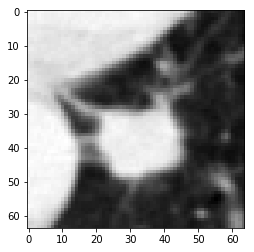

In [533]:
x=np.load('ct_patch000.npy')
plt.imshow(x[:,:,1], cmap=plt.cm.gray)
plt.show()

In [511]:
anns = all_anns.filter(pl.Annotation.scan_id==0)
scan = all_scans[scan_id]
images = scan.load_all_dicom_images()
first_image = images[0].pixel_array
[width, height] = first_image.shape
num_slices = len(images)
images_array = np.zeros((num_slices, width, height))
for i in range(num_slices):
    images_array[i,:,:] = images[i].pixel_array
image_tran = images_array.transpose((1,2,0))
lower_bound = [128, 343, 46]
box_size = 64
z_cut = 7
ct_patch = image_tran[lower_bound[0]:lower_bound[0]+box_size, lower_bound[1]:lower_bound[1]+box_size, 
                                    lower_bound[2]:lower_bound[2]+z_cut]
print(image_tran.shape)

Loading dicom files ... This may take a moment.
(512, 512, 136)


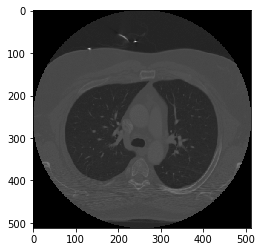

TypeError: Invalid dimensions for image data

In [513]:
plt.imshow(image_tran[:,:,92], cmap=plt.cm.gray)
plt.show()
#plt.imshow(mask)

In [507]:
anns_clustered = all_scans[0].cluster_annotations()
print(len(anns_clustered[0]),len(anns_clustered[1]),len(anns_clustered[2]),len(anns_clustered[3]))

4 4 1 4


Loading dicom files ... This may take a moment.


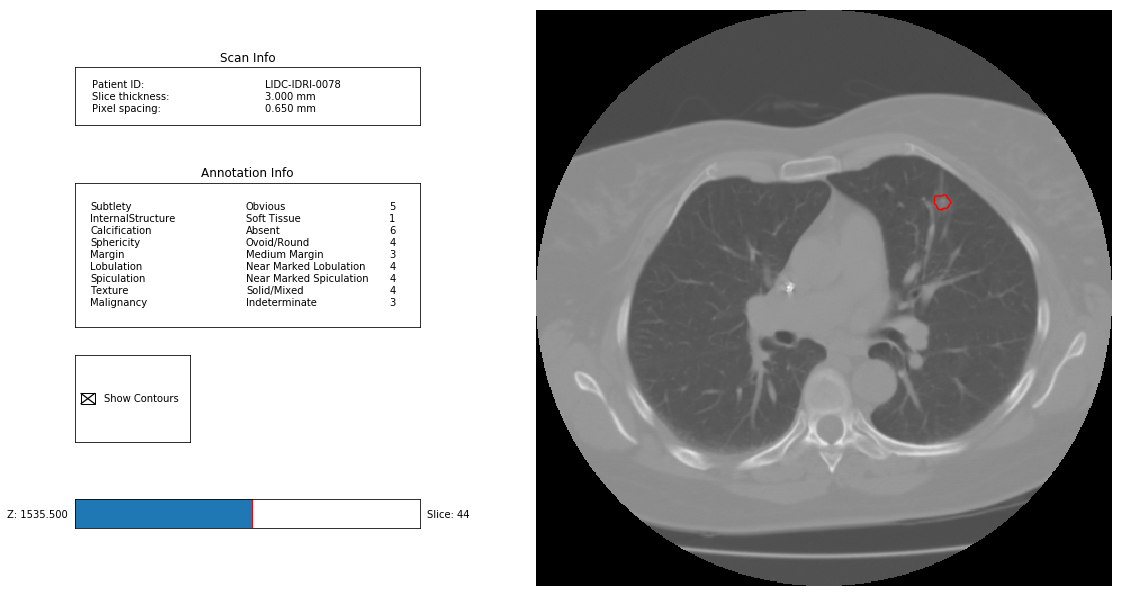

In [510]:
anns_clustered[1][3].visualize_in_scan()

In [481]:
mask_test = np.load('mask012.npy')
ct_patch_test = np.load('ct_patch012.npy')

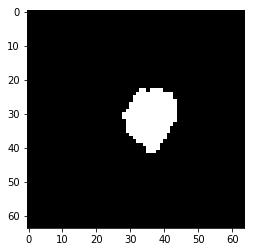

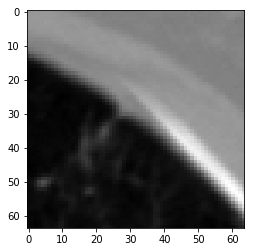

In [483]:
plt.imshow(mask_test[:,:,2],cmap=plt.cm.gray)
plt.show()
plt.imshow(ct_patch_test[:,:,2], cmap = plt.cm.gray)
plt.show()

In [325]:
all_anns = pl.query(pl.Annotation).join(pl.Scan)
num_anns = all_anns.count()
diam = np.zeros(num_anns)
for i in range(num_anns):
    diam[i] = all_anns[i].estimate_diameter()


In [331]:
ind = np.argmax(diam)
print(ind)

1623


Loading dicom files ... This may take a moment.


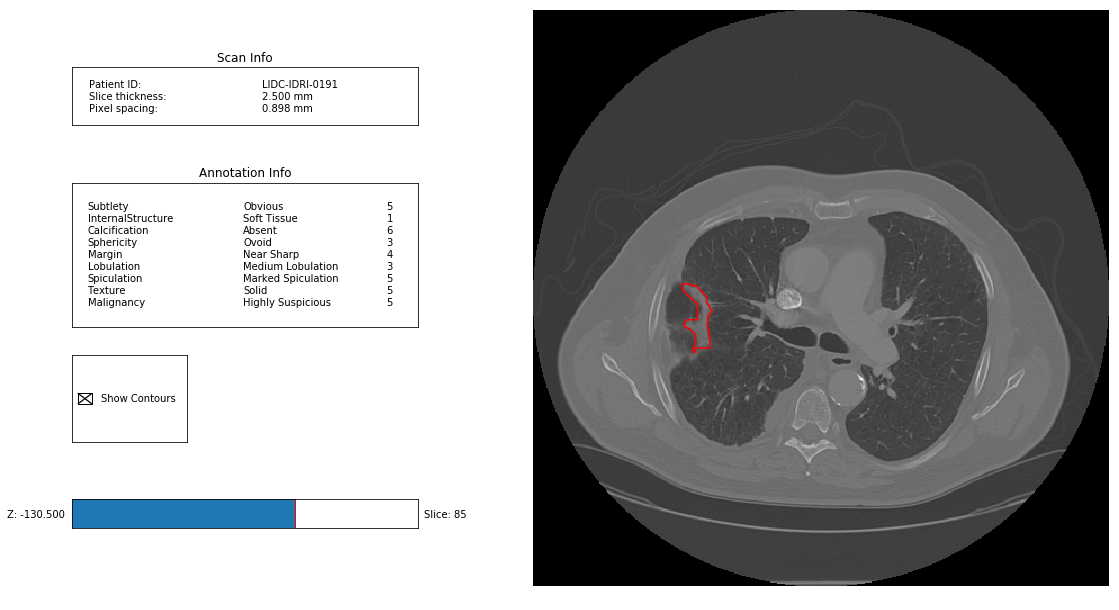

In [332]:
all_anns[ind].visualize_in_scan()

In [304]:
all_anns = pl.query(pl.Annotation).join(pl.Scan)
print(all_scans.count())
print(all_anns.count())

anns_2 = all_anns.filter(pl.Annotation.scan_id==2)
print(anns_2[0])
print(anns_2.count())

all_scans = pl.query(pl.Scan)
images = all_scans[1]
anns_2_clustered = images.cluster_annotations()
#print(len(anns_2_clustered))
#print(len(anns_2_clustered[0]))

#anns_2[0].contours_to_matrix

1018
6859
Annotation(id=14,scan_id=2)
9


In [384]:
num_scans = all_scans.count()
count = 0
for scan_id in range(num_scans):
    anns = all_anns.filter(pl.Annotation.scan_id==scan_id)
    images = all_scans[scan_id]
    anns_clustered = images.cluster_annotations()
    for cluster in range(len(anns_clustered)):
        if len(anns_clustered[cluster]) == 4:
            count += 1


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some n

In [385]:
print(count)

896


In [ ]:
num_scans = all_scans.count()
for scan_id in range(num_scans):
    anns = all_anns.filter(pl.Annotation.scan_id=scan_id)
    images = all_scans[scan_id]
    anns_clustered = images.cluster_annotations()
    for cluster in range(len(anns_clustered)):
        if len(anns_clustered[cluster]) == 4:
            mask0, bbox0 = anns_clustered[cluster][0].get_boolean_mask(return_bbox=True)
            mask1, bbox1 = anns_clustered[cluster][1].get_boolean_mask(return_bbox=True)
            mask2, bbox2 = anns_clustered[cluster][2].get_boolean_mask(return_bbox=True)
            mask3, bbox3 = anns_clustered[cluster][3].get_boolean_mask(return_bbox=True)
            bbox_min = np.zeros(3)
            bbox_min[0] = np.min([bbox0[0,0], bbox1[0,0], bbox2[0,0], bbox3[0,0]])
            bbox_min[1] = np.min([bbox0[1,0], bbox1[1,0], bbox2[1,0], bbox3[1,0]])
            bbox_min[2] = np.min([bbox0[2,0], bbox1[2,0], bbox2[2,0], bbox3[2,0]])
            bbox_max = np.zeros(3)
            bbox_max[0] = np.max([bbox0[0,1], bbox1[0,1], bbox2[0,1], bbox3[0,1]])
            bbox_max[1] = np.max([bbox0[1,1], bbox1[1,1], bbox2[1,1], bbox3[1,1]])
            bbox_max[2] = np.max([bbox0[2,1], bbox1[2,1], bbox2[2,1], bbox3[2,1]])

            slice_thickness = 2.0
            mask_new = np.zeros((4,int(bbox_max[0] - bbox_min[0]+1),int(bbox_max[1] - bbox_min[1]+1),
                                 int((bbox_max[2] - bbox_min[2])/slice_thickness+1)))

            margin0 = bbox0[:,0] - bbox_min
            margin1 = bbox1[:,0] - bbox_min
            margin2 = bbox2[:,0] - bbox_min
            margin3 = bbox3[:,0] - bbox_min
            margin0 = np.asarray(margin0, dtype=int)
            margin1 = np.asarray(margin1, dtype=int)
            margin2 = np.asarray(margin2, dtype=int)
            margin3 = np.asarray(margin3, dtype=int)

            mask_new[0,margin0[0]:int(margin0[0]+(bbox0[0,1]-bbox0[0,0])+1),margin0[1]:int(margin0[1]+(bbox0[1,1]-bbox0[1,0])+1),
                     margin0[2]:int((margin0[2]+(bbox0[2,1]-bbox0[2,0])/slice_thickness+1))] = mask0
            mask_new[1,margin1[0]:int(margin1[0]+(bbox1[0,1]-bbox1[0,0])+1),margin1[1]:int(margin1[1]+(bbox1[1,1]-bbox1[1,0])+1),
                     margin1[2]:int((margin1[2]+(bbox1[2,1]-bbox1[2,0])/slice_thickness+1))] = mask1
            mask_new[2,margin2[0]:int(margin2[0]+(bbox2[0,1]-bbox2[0,0])+1),margin2[1]:int(margin2[1]+(bbox2[1,1]-bbox2[1,0])+1),
                     margin2[2]:int((margin2[2]+(bbox2[2,1]-bbox2[2,0])/slice_thickness+1))] = mask2
            mask_new[3,margin3[0]:int(margin3[0]+(bbox3[0,1]-bbox3[0,0])+1),margin3[1]:int(margin3[1]+(bbox3[1,1]-bbox3[1,0])+1),
                     margin3[2]:int((margin3[2]+(bbox3[2,1]-bbox3[2,0])/slice_thickness+1))] = mask3

            print(mask_new.shape)
            [p, width, height, z] = mask_new.shape
            #plt.imshow(mask_new[0,:,:,8],cmap = plt.cm.gray)
            #plt.show()
            mask_sum = np.zeros(mask_new.shape[1:])
            mask_final = np.zeros(mask_new.shape[1:])

            for i in range(width):
                for j in range(height):
                    for k in range(z):
                        mask_sum[i,j,k] = np.sum(mask_new[:,i,j,k])
                        if mask_sum[i,j,k] >= 3:
                            mask_final[i,j,k] = 1
                            

In [300]:
anns_set = anns_2[0]._as_set()
#anns_set = anns_set.sorted()
anns_list = [i for i in anns_set]
print(len(anns_list))

#print(anns_list)
#print(anns_list[0:10])


1531


In [193]:
ct_volume, mask = anns_2[0].uniform_cubic_resample(side_length=35)
print(ct_volume.shape, mask.shape)
#plt.imshow(ct_volume[:,:,35] * (0.2 + 0.8*mask[:,:,35]) )


Loading dicom files ... This may take a moment.
(36, 36, 36) (36, 36, 36)


[[ 242.   305. ]
 [ 128.   192. ]
 [-130.5 -108. ]]
[ 63.   64.   22.5]
(64, 65, 10)


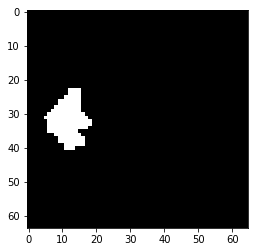

In [347]:
mask, bbox = all_anns[1623].get_boolean_mask(return_bbox=True)
print(bbox)
print(bbox[:,1]-bbox[:,0])
print(mask.shape)
plt.imshow(mask[:,:,8],cmap=plt.cm.gray)
plt.show()

[  359.     96.   1446.5]
(4, 29, 43, 11)
(29, 43, 11)


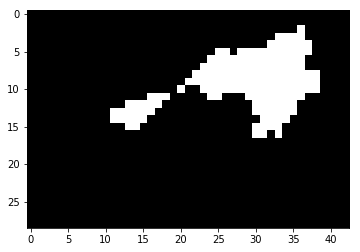

In [431]:
#type(anns_2_clustered[2][0])
mask0, bbox0 = anns_2_clustered[2][0].get_boolean_mask(return_bbox=True)
mask1, bbox1 = anns_2_clustered[2][1].get_boolean_mask(return_bbox=True)
mask2, bbox2 = anns_2_clustered[2][2].get_boolean_mask(return_bbox=True)
mask3, bbox3 = anns_2_clustered[2][3].get_boolean_mask(return_bbox=True)
bbox_min = np.zeros(3)
bbox_min[0] = np.min([bbox0[0,0], bbox1[0,0], bbox2[0,0], bbox3[0,0]])
bbox_min[1] = np.min([bbox0[1,0], bbox1[1,0], bbox2[1,0], bbox3[1,0]])
bbox_min[2] = np.min([bbox0[2,0], bbox1[2,0], bbox2[2,0], bbox3[2,0]])
bbox_max = np.zeros(3)
bbox_max[0] = np.max([bbox0[0,1], bbox1[0,1], bbox2[0,1], bbox3[0,1]])
bbox_max[1] = np.max([bbox0[1,1], bbox1[1,1], bbox2[1,1], bbox3[1,1]])
bbox_max[2] = np.max([bbox0[2,1], bbox1[2,1], bbox2[2,1], bbox3[2,1]])
print(bbox_min)

slice_thickness = 2.0
mask_new = np.zeros((4,int(bbox_max[0] - bbox_min[0]+1),int(bbox_max[1] - bbox_min[1]+1),int((bbox_max[2] - bbox_min[2])/slice_thickness+1)))

margin0 = bbox0[:,0] - bbox_min
margin1 = bbox1[:,0] - bbox_min
margin2 = bbox2[:,0] - bbox_min
margin3 = bbox3[:,0] - bbox_min
margin0 = np.asarray(margin0, dtype=int)
margin1 = np.asarray(margin1, dtype=int)
margin2 = np.asarray(margin2, dtype=int)
margin3 = np.asarray(margin3, dtype=int)

mask_new[0,margin0[0]:int(margin0[0]+(bbox0[0,1]-bbox0[0,0])+1),margin0[1]:int(margin0[1]+(bbox0[1,1]-bbox0[1,0])+1),
         margin0[2]:int((margin0[2]+(bbox0[2,1]-bbox0[2,0])/slice_thickness+1))] = mask0
mask_new[1,margin1[0]:int(margin1[0]+(bbox1[0,1]-bbox1[0,0])+1),margin1[1]:int(margin1[1]+(bbox1[1,1]-bbox1[1,0])+1),
         margin1[2]:int((margin1[2]+(bbox1[2,1]-bbox1[2,0])/slice_thickness+1))] = mask1
mask_new[2,margin2[0]:int(margin2[0]+(bbox2[0,1]-bbox2[0,0])+1),margin2[1]:int(margin2[1]+(bbox2[1,1]-bbox2[1,0])+1),
         margin2[2]:int((margin2[2]+(bbox2[2,1]-bbox2[2,0])/slice_thickness+1))] = mask2
mask_new[3,margin3[0]:int(margin3[0]+(bbox3[0,1]-bbox3[0,0])+1),margin3[1]:int(margin3[1]+(bbox3[1,1]-bbox3[1,0])+1),
         margin3[2]:int((margin3[2]+(bbox3[2,1]-bbox3[2,0])/slice_thickness+1))] = mask3

print(mask_new.shape)
[p, width, height, z] = mask_new.shape
#plt.imshow(mask_new[0,:,:,8],cmap = plt.cm.gray)
#plt.show()
mask_sum = np.zeros(mask_new.shape[1:])
mask_overlap = np.zeros(mask_new.shape[1:])

for i in range(width):
    for j in range(height):
        for k in range(z):
            mask_sum[i,j,k] = np.sum(mask_new[:,i,j,k])
            if mask_sum[i,j,k] >= 3:
                mask_overlap[i,j,k] = 1
print(mask_overlap.shape)

plt.imshow(mask_overlap[:,:,2],cmap = plt.cm.gray)
plt.show()

In [432]:
for i in range(4):
    contours[i] = sorted(anns_2_clustered[2][i].contours, key=lambda c: c.image_z_position)
    fnames[i] = anns_2_clustered[2][i].scan.sorted_dicom_file_names.split(',')
    index_of_contour = [fnames[i].index(c.dicom_file_name) for c in contours[i]]
    min_slice = min(min(index_of_contour),min_slice)
print(min_slice)
lower_bound = [int(bbox_min[0]),int(bbox_min[1]),min_slice]
print(lower_bound)
#zs = np.unique([c.image_z_position for c in anns_2_clustered[2][0].contours])
#z_to_index = dict(zip(zs,range(len(zs))))
#print(z_to_index)

79
[359, 96, 79]


Loading dicom files ... This may take a moment.


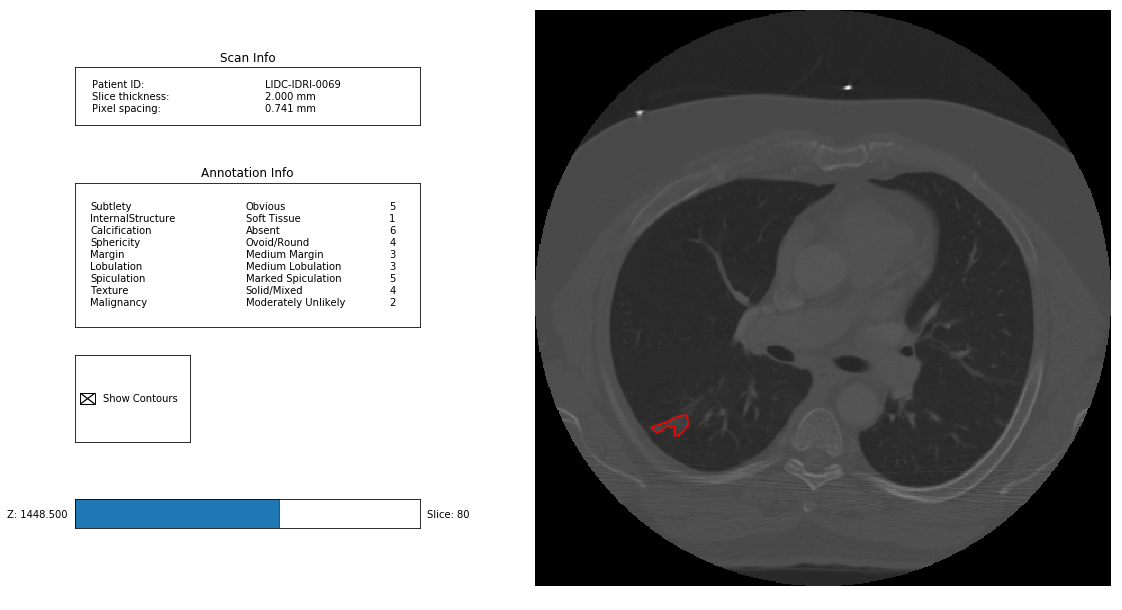

In [404]:
anns_2_clustered[2][3].visualize_in_scan()

(64, 64, 7)
2.0
[303  78  85]
Loading dicom files ... This may take a moment.
136
(512, 512, 136)
(65, 65, 7)
(64, 64, 3)


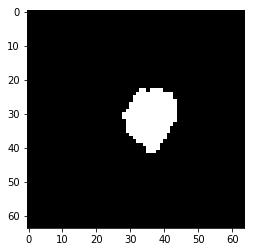

In [441]:
box_size = 64
mask_where = np.argwhere(mask_overlap == 1)
box_new_min = np.min(mask_where, axis = 0)
box_new_max = np.max(mask_where, axis = 0)
mask_overlap_cut = mask_overlap[box_new_min[0]:box_new_max[0]+1,box_new_min[1]:box_new_max[1]+1,box_new_min[2]:box_new_max[2]+1]

[width_cut, height_cut, z_cut] = mask_overlap_cut.shape
num_pad_width0 = int(np.floor((box_size - width_cut)/2))
num_pad_width1 = int(box_size - width_cut - num_pad_width0)
num_pad_height0 = int(np.floor((box_size - height_cut)/2))
num_pad_height1 = int(box_size - height_cut - num_pad_height0)

#mask1 = mask_overlap_cut[:,:,0]

mask_pad = np.pad(mask_overlap_cut, ((num_pad_width0, num_pad_width1),(num_pad_height0, num_pad_height1),(0,0)), 
                  'constant', constant_values = ((0,0),(0,0),(0,0)))

print(mask_pad.shape)
print(np.floor(np.size(mask_pad,2)/3))
#num_save = int(np.floor(z_cut / 3))
for i in range(z_cut-1):
    np.save('test'+str(i),mask_pad[:,:,i:i+3])
#if z_cut - num_save*3 == 2:
#    num_save += 1
#    np.save('test'+str(num_save),mask_pad[:,:,z_cut-2:z_cut+1])

lower_bound = lower_bound + box_new_min - [num_pad_width0, num_pad_height0, 0]
print(lower_bound)

images = all_scans[1].load_all_dicom_images()
first_image = images[0].pixel_array
[width, height] = first_image.shape
num_slices = len(images)
print(num_slices)
images_array = np.zeros((num_slices, width, height))
for i in range(num_slices):
    images_array[i,:,:] = images[i].pixel_array

image_tran = images_array.transpose((1,2,0))
print(image_tran.shape)
ct_patches = image_tran[lower_bound[0]:lower_bound[0]+64, lower_bound[1]:lower_bound[1]+64, lower_bound[2]:lower_bound[2]+z_cut]
print(ct_patches.shape)

x = np.load('test3.npy')
print(x.shape)
plt.imshow(x[:,:,1],cmap=plt.cm.gray)
plt.show()
#print(mask_final_cut.shape)
#plt.imshow(mask_final_cut[:,:,1],cmap = plt.cm.gray)
#plt.show()

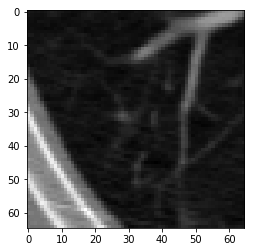

In [440]:
plt.imshow(ct_patches[:,:,6],cmap=plt.cm.gray)
plt.show()

In [259]:
mask_new = np.zeros((int(bbox_max[0] - bbox_min[0]),int(bbox_max[1] - bbox_min[1]),int((bbox_max[2] - bbox_min[2])/slice_thickness+1)))
print(mask_new.shape)
print(mask_new[1:28,:,:].shape)

(28, 42, 10)
(27, 42, 10)


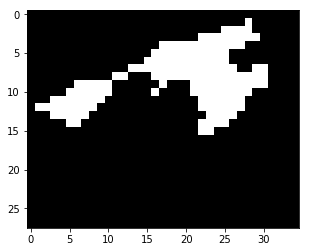

[[  360.    387. ]
 [  104.    138. ]
 [ 1448.5  1460.5]]
(28, 35, 7)


In [249]:
mask, bbox = anns_2[0].get_boolean_mask(return_bbox=True)
plt.imshow(mask[:,:,0],cmap = plt.cm.gray)
plt.show()
print(bbox)
type(bbox)
print(mask.shape)

In [188]:
print(len(anns_2_clustered[0]),len(anns_2_clustered[1]),len(anns_2_clustered[2]))
anns_2[0].estimate_diameter()

4 1 4


23.919498364305202

Loading dicom files ... This may take a moment.


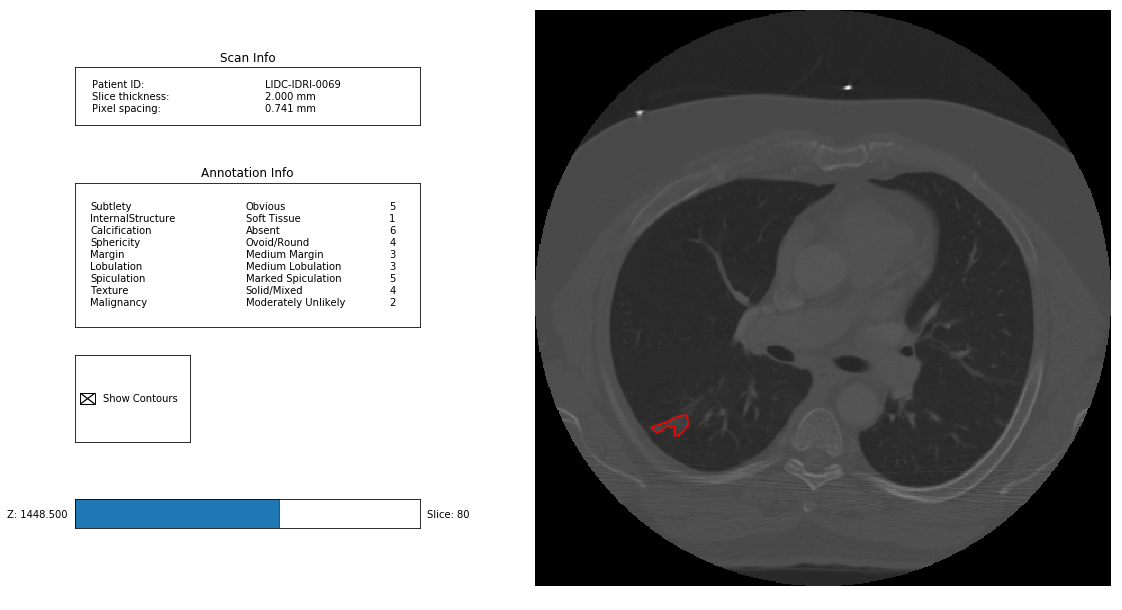

In [87]:
anns_2_clustered[2][3].visualize_in_scan()

Loading dicom files ... This may take a moment.


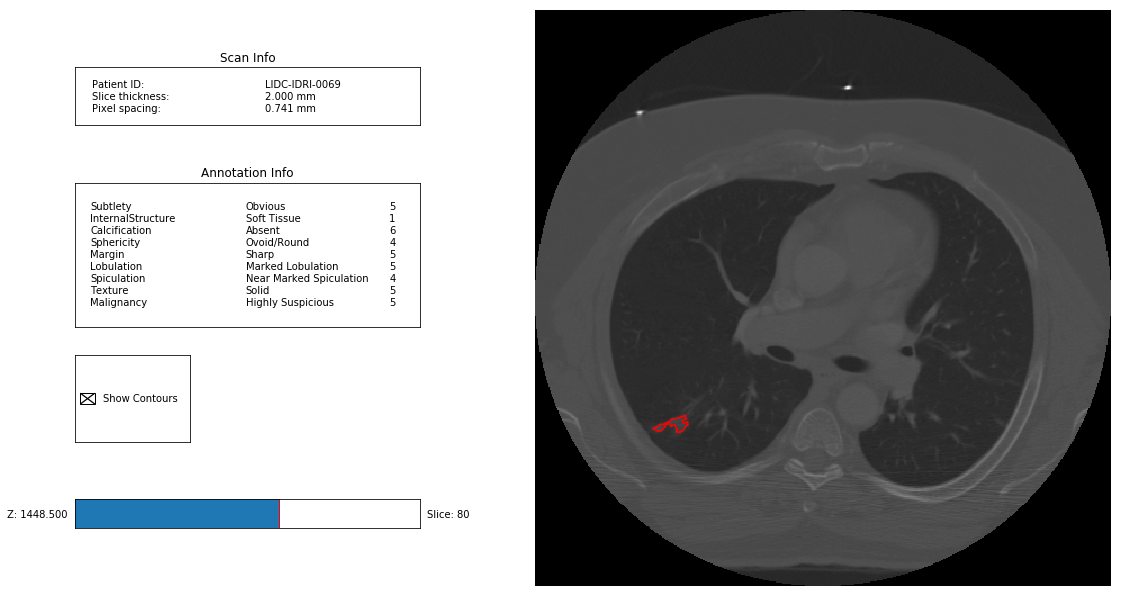

In [77]:
anns_2[0].visualize_in_scan()

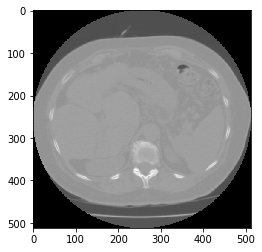

In [50]:

images = np.load('0000.npy')

plt.imshow( images[0], cmap=plt.cm.gray )
plt.show()

In [11]:
images = all_anns[0].scan.load_all_dicom_images()
# Preload contours and sort them by z pos.
contours = sorted(all_anns[0].contours, key=lambda c: c.image_z_position)
print(type(contours))
fnames = all_anns[0].scan.sorted_dicom_file_names.split(',')
print(type(fnames))
index_of_contour = fnames.index(contours[2].dicom_file_name)
print(len(fnames))
print(len(contours))
print(index_of_contour)

Loading dicom files ... This may take a moment.
<class 'list'>
<class 'list'>
87
6
46
